<h1>Problem Statement: </h1>

Python - Weather Forecasting Tool
<br>
<p>
  Create a command-line tool that accepts a city's name and returns the current weather forecast. Leverage OpenWeatherMap API to fetch weather data and parse it using Python. Your solution should demonstrate how GitHub Copilot can help you with API usage, data parsing, and error handling.
</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import json
import warnings
warnings.filterwarnings('ignore')

In [ ]:
API_KEY = "8222d3f76852daaefd9394c4e83c85ee"

In [ ]:
CITY_NAME="delhi"
URL="http://api.openweathermap.org/geo/1.0/direct?q={}&limit=5&appid={}".format(CITY_NAME, API_KEY)

response = requests.get(URL)

In [ ]:
print(response)

<Response [200]>


In [ ]:
data = response.json()
#data

In [ ]:
if response.status_code == 200:
  name = data[0]['name']
  local_name = data[0]['local_names']['en']
  latitude = data[0]['lat']
  longitude = data[0]['lon']
  country = data[0]['country']
  state = data[0]['state']
  geocode_data = {"name":name,
                 "local_name":local_name,
                 "latitude":latitude,
                 "longitude":longitude,
                 "country":country,
                 "state":state}

geocode_data

{'name': 'Delhi',
 'local_name': 'Delhi',
 'latitude': 28.6517178,
 'longitude': 77.2219388,
 'country': 'IN',
 'state': 'Delhi'}

In [ ]:
city="delhi"

In [ ]:
## Current Weather Data
CURR_WEATHER_URL = ""

In [ ]:
from datetime import date
import time

today = date.today()
print("Today's date:", today)
unix = time.mktime(today.timetuple())
unix_today = int(unix)-86400 #4th June
unix_month = unix_today - 2419200 #4th May

unix_today = str(unix_today)
unix_month = str(unix_month)
print(unix_today, unix_month)

Today's date: 2023-06-26
1687651200 1685232000


In [ ]:
weather_data_list=[]
for i in range(4):
  start=int(unix_month) +(i*604800)
  start = str(start)
  end= int(start)+604800
  end=str(end)

  HIST_URL = f"https://history.openweathermap.org/data/2.5/history/city?lat={latitude}&lon={longitude}&type=day&start={start}&end={end}&appid={API_KEY}"
  response_hist = requests.get(HIST_URL)

  hist = response_hist.json()
  data = hist['list']


  for i in data:

    weather_data = {
              "date": pd.Timestamp.utcfromtimestamp(i["dt"]).strftime("%Y-%m-%d %H:%M:%S"),
              "city": city,
              "pressure": i['main']["pressure"],
              "temperature_Min": i['main']["temp_min"],
              "temperature_Max": i['main']["temp_max"],
              "humidity": i['main']["humidity"],
              "description": i["weather"][0]["description"]
          }
    weather_data_list.append(weather_data)

df = pd.DataFrame(weather_data_list)
df['temperature_Min'] = df['temperature_Min'] - 273.15
df['temperature_Max'] = df['temperature_Max'] - 273.15

df.shape

(676, 7)

In [ ]:
df=df.drop_duplicates()
df.shape

(673, 7)

In [ ]:
df = df.reset_index(drop=True)
df.shape

(673, 7)

In [ ]:
df.head()

,date,city,pressure,temperature_Min,temperature_Max,humidity,description
0,2023-05-28 00:00:00,delhi,1006,27.69,27.69,47,clear sky
1,2023-05-28 01:00:00,delhi,1007,26.05,26.05,78,mist
2,2023-05-28 02:00:00,delhi,1008,27.05,27.05,69,haze
3,2023-05-28 03:00:00,delhi,1007,26.96,29.05,78,mist
4,2023-05-28 04:00:00,delhi,1008,29.96,29.96,66,haze


In [ ]:
df.tail()

,date,city,pressure,temperature_Min,temperature_Max,humidity,description
668,2023-06-24 20:00:00,delhi,1001,30.05,30.05,84,mist
669,2023-06-24 21:00:00,delhi,999,30.05,30.05,84,mist
670,2023-06-24 22:00:00,delhi,1000,27.05,27.05,94,light rain
671,2023-06-24 23:00:00,delhi,1002,25.05,25.05,94,thunderstorm with rain
672,2023-06-25 00:00:00,delhi,1002,25.05,25.05,100,thunderstorm with light rain


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Preprocess the data
df['date'] = pd.to_datetime(df['date'])
encoded_df = pd.get_dummies(df, columns=['city', 'description'])
X = encoded_df.drop(['date', 'pressure', 'temperature_Min', 'temperature_Max', 'humidity'], axis=1)
y = encoded_df[['pressure', 'temperature_Min', 'temperature_Max', 'humidity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Preprocess the data
df['date'] = pd.to_datetime(df['date'])
encoded_df = pd.get_dummies(df, columns=['city', 'description'])
X = encoded_df.drop(['date', 'pressure', 'temperature_Min', 'temperature_Max', 'humidity'], axis=1)
y = encoded_df[['pressure', 'temperature_Min', 'temperature_Max', 'humidity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the last row from the dataset
last_row = X.tail(1)

# Make predictions for the next 7 rows
predictions = []
for _ in range(7):
    next_prediction = model.predict(last_row)
    predictions.append(next_prediction)
    next_row = pd.DataFrame(columns=X.columns, data=next_prediction)
    last_row = pd.concat([last_row, next_row], ignore_index=True)

# Convert the predictions back to the original units if necessary
# ...

# Print the predicted values
for prediction in predictions:
    print(prediction)


In [ ]:
import statistics

def most_common(lst):
    return max(set(lst), key=lst.count)

weather_data_list_new=[]

for day in range(28):
  npressure = []
  ntemp_max =[]
  ntemp_min=[]
  nhumidity=[]
  ndescription=[]
  for hr in range(day*24,((day*24)+24)):
    npressure.append(df['pressure'][hr])
    ntemp_max.append(df['temperature_Max'][hr])
    ntemp_min.append(df['temperature_Min'][hr])
    nhumidity.append(df['humidity'][hr])
    ndescription.append(df['description'][hr])

  pr = statistics.mean(npressure)
  tmin=statistics.mean(ntemp_min)
  tmax =statistics.mean(ntemp_max)
  hum = statistics.mean(nhumidity)
  desc = most_common(ndescription)
  weather_data = {
              "date": df['date'][day*24][:10],
              "city": city,
              "pressure": pr,
              "temperature": (tmin+tmax)/2,
              "humidity": hum,
              "description": desc
          }
  weather_data_list_new.append(weather_data)

df_update = pd.DataFrame(weather_data_list_new)
df_update.shape

In [ ]:
df_update.head(28)

In [ ]:
d = []
for i in df['date']:
  d.append(i[:10])

import collections


# using Counter to find frequency of d
frequency = collections.Counter(d)

# printing the frequency
print(dict(frequency))


In [ ]:
hist = response_hist.json()

In [ ]:
data1 = hist['list']

In [ ]:
len(data1)

In [ ]:
weather_data_list=[]
for i in data1:

  weather_data = {
            "date": pd.Timestamp.utcfromtimestamp(i["dt"]).strftime("%Y-%m-%d %H:%M:%S"),
            "city": "Delhi",
            "pressure": i['main']["pressure"],
            "temperature_Min": i['main']["temp_min"],
            "temperature_Max": i['main']["temp_max"],
            "humidity": i['main']["humidity"],
            "description": i["weather"][0]["description"]
        }
  weather_data_list.append(weather_data)

df = pd.DataFrame(weather_data_list)
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
import requests
import json
import pandas as pd

def get_weather(api_key, latitude, longitude, start, end):
    base_url = f"https://history.openweathermap.org/data/2.5/history/city?lat={latitude}&lon={longitude}&type=hour&start={start}&end={end}&appid={API_KEY}"
    # params = {
    #     "lat": "",  # Latitude of the city
    #     "lon": "",  # Longitude of the city
    #     "dt": date,  # Date in Unix timestamp format
    #     "appid": api_key,
    #     "units": "metric"
    # }

    # # Retrieving latitude and longitude for the city using geo
    # location_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}"
    # location_response = requests.get(location_url)
    # location_data = location_response.json()
    # if not location_data:
    #     print("City not found.")
    #     return None

    # params["lat"] = location_data[0]["lat"]
    # params["lon"] = location_data[0]["lon"]

    try:
        response = requests.get(base_url)
        data = response.json()

        if "current" not in data:
            print("Weather data not found.")
            return None

        weather_data = {
            "date": pd.Timestamp.utcfromtimestamp(hist["list"]["dt"]).strftime("%Y-%m-%d %H:%M:%S"),
            "city": "Delhi",
            "pressure": hist["list"]["pressure"],
            "temperature_Min": hist["list"]["temp_min"],
            "temperature_Max": hist["list"]["temp_max"],
            "humidity": hist["list"]["humidity"],
            "description": hist["list"]["weather"][0]["description"]
        }

        return weather_data

    except requests.exceptions.RequestException as e:
        print("Error: ", e)
        return None


city = input("Enter the city of your choice: ")
start_date = pd.Timestamp.now() - pd.DateOffset(days=10)  # Start date for weather history
end_date = pd.Timestamp.now() - pd.DateOffset(days=1)

weather_data_list = []

# Iterating over the date range to fetch weather history
for date in pd.date_range(start_date, end_date):
    formatted_date = int(date.timestamp())
    weather = get_weather(API_KEY, "Delhi", formatted_date)
    if weather:
        weather_data_list.append(weather)

df = pd.DataFrame(weather_data_list)
print(df)




weather_data

In [ ]:
## Bulk Download

In [ ]:
pip install requests


In [ ]:
import requests
import json

def get_weather(api_key, city):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city,
        "appid": api_key,
        "units": "metric"
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if data["cod"] == "404":
            print("City not found.")
            return None

        weather_data = {
            "city": data["name"],
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "description": data["weather"][0]["description"]
        }

        return weather_data

    except requests.exceptions.RequestException as e:
        print("Error: ", e)
        return None


api_key = '8222d3f76852daaefd9394c4e83c85ee'#api key
city=input("Enter the city of your choice: ")


weather = get_weather(api_key, city)
if weather:
    print("Weather in {}: ".format(weather["city"]))
    print("Temperature: {}°C".format(weather["temperature"]))
    print("Humidity: {}%".format(weather["humidity"]))
    print("Description: {}".format(weather["description"]))


In [ ]:
pip install pandas


In [ ]:
import requests
import json
import pandas as pd

def get_weather(api_key, city, date):
    base_url = "https://api.openweathermap.org/data/2.5/onecall/timemachine"
    params = {
        "lat": "",  # Latitude of the city
        "lon": "",  # Longitude of the city
        "dt": date,  # Date in Unix timestamp format
        "appid": api_key,
        "units": "metric"
    }

    # Retrieving latitude and longitude for the city using geo
    location_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}"
    location_response = requests.get(location_url)
    location_data = location_response.json()
    if not location_data:
        print("City not found.")
        return None

    params["lat"] = location_data[0]["lat"]
    params["lon"] = location_data[0]["lon"]

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if "current" not in data:
            print("Weather data not found.")
            return None

        weather_data = {
            "date": pd.Timestamp.utcfromtimestamp(data["current"]["dt"]).strftime("%Y-%m-%d %H:%M:%S"),
            "city": city,
            "temperature": data["current"]["temp"],
            "humidity": data["current"]["humidity"],
            "description": data["current"]["weather"][0]["description"]
        }

        return weather_data

    except requests.exceptions.RequestException as e:
        print("Error: ", e)
        return None


api_key = '8222d3f76852daaefd9394c4e83c85ee'
city = input("Enter the city of your choice: ")
start_date = pd.Timestamp.now() - pd.DateOffset(days=5)  # Start date for weather history
end_date = pd.Timestamp.now() - pd.DateOffset(days=1)

weather_data_list = []

# Iterating over the date range to fetch weather history
for date in pd.date_range(start_date, end_date):
    formatted_date = int(date.timestamp())
    weather = get_weather(api_key, city, formatted_date)
    if weather:
        weather_data_list.append(weather)

df = pd.DataFrame(weather_data_list)
print(df)


In [ ]:
df.head()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Split the data into features (X) and target variables (y)
X = df[['temperature', 'humidity']]
y_temperature = df['temperature']
y_humidity = df['humidity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_temperature, test_size=0.2, random_state=42)



In [ ]:
#Train the Random Forest model for temperature prediction
temperature_model = RandomForestRegressor()
temperature_model.fit(X_train, y_train)

# Make predictions for today and tomorrow
today_data = pd.DataFrame({
    "temperature": [0],
    "humidity": [0]
})

today_temperature_prediction = temperature_model.predict(today_data)

print("Today's temperature prediction:", today_temperature_prediction)




In [ ]:
# Train the Random Forest model for temperature prediction
temperature_model = RandomForestRegressor()
temperature_model.fit(X_train, y_train)

# Make prediction for today's temperature
today_data = pd.DataFrame({
    "temperature": [0],
    "humidity": [0]
})

today_temperature_prediction = temperature_model.predict(today_data)
# Train the Random Forest model for humidity prediction
humidity_model = RandomForestRegressor()
humidity_model.fit(X_train, y_train)

today_humidity_prediction = humidity_model.predict(today_data)


# Adding today's data to the DataFrame for tomorrow's prediction
df_tomorrow = pd.DataFrame({
    "city": city,
    "temperature": today_temperature_prediction,
    "humidity": today_humidity_prediction,
    "description": [""]
})

# Concatenate tomorrow's data with the existing DataFrame
df1 = pd.concat([df, df_tomorrow], ignore_index=True)

# Drop the date column
df1.drop('date', axis=1, inplace=True)
print(df1)

In [ ]:
# Split the data into features (X) and target variables (y)
X = df1[['temperature', 'humidity']]
y_temperature = df1['temperature']
y_humidity = df1['humidity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_temperature, test_size=0.2, random_state=42)

# Retrain the Random Forest model for temperature prediction
temperature_model.fit(X_train, y_train)

# Make prediction for tomorrow's temperature
tomorrow_data = df_tomorrow[['temperature', 'humidity']]
tomorrow_temperature_prediction = temperature_model.predict(tomorrow_data)
tomorrow_humidity_prediction = humidity_model.predict(tomorrow_data)

print("Today's temperature prediction:", today_temperature_prediction)
print("Tomorrow's temperature prediction:", tomorrow_temperature_prediction)


print("Today's humidity prediction:", today_humidity_prediction)
print("Tomorrow's humidity prediction:", tomorrow_humidity_prediction)

In [ ]:
tomorrow_data

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Split the data into features (X) and target variable (y_temperature)
X = df[['temperature', 'humidity']]
y_temperature = df['temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_temperature, test_size=0.2, random_state=42)

# Train the Random Forest model for temperature prediction
temperature_model = RandomForestRegressor()
temperature_model.fit(X_train, y_train)

# Make predictions for the test set
y_test_pred = temperature_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


In [ ]:
#actual 7 days forcast as fetched by the api
import requests

api_key = '8222d3f76852daaefd9394c4e83c85ee'

# Set the place name
place_name = input("Enter the place name: ")

geocode_url = f'https://api.openweathermap.org/geo/1.0/direct?q={place_name}&limit=1&appid={api_key}'
geocode_response = requests.get(geocode_url)

if geocode_response.status_code == 200:
    geocode_data = geocode_response.json()

    if geocode_data:
        latitude = geocode_data[0]['lat']
        longitude = geocode_data[0]['lon']


        weather_url = f'http://api.openweathermap.org/data/2.5/onecall?lat={latitude}&lon={longitude}&exclude=minutely,current&appid={api_key}&units=metric'
        response = requests.get(weather_url)

        if response.status_code == 200:
            data = response.json()




            # Fetch hourly forecast for 48 hours
            hourly_forecast = data['hourly']

            # Fetch daily forecast for 7 days
            daily_forecast = data['daily']

            # Fetch national weather alerts if available
            alerts = data.get('alerts', [])

            print('\nHourly Forecast for 48 Hours:')
            print(hourly_forecast)
            print('\nDaily Forecast for 7 Days:')
            print(daily_forecast)
            print('\nNational Weather Alerts:')
            print(alerts)
        else:
            print('Error:', response.status_code)
    else:
        print('Error: No geocoding results found for the specified place')
else:
    print('Error:', geocode_response.status_code)


In [ ]:
            # Create a list to store the daily forecast data
            forecast_data = []

            # Iterate over each day in the daily forecast
            for day in daily_forecast:
                date = pd.to_datetime(day['dt'], unit='s').date()
                temp = day['temp']['day']
                humidity = day['humidity']
                description = day['weather'][0]['description']
                forecast_data.append({'Date': date, 'Temperature (°C)': temp, 'Humidity (%)': humidity, 'Description': description})

            # Create a dataframe from the forecast data
            df_daily_forecast = pd.DataFrame(forecast_data)

            print('Daily Forecast for 7 Days:')
            print(df_daily_forecast)



### Model Evaluation

In [ ]:
df_pred=pd.read_csv('/content/prediction_data.csv')
df_actual=pd.read_csv('/content/actual_data.csv')

df_final=pd.DataFrame([df_actual['Date'], df_actual['Temperature (Â°C)'],df_pred['temperature'],df_actual['Pressure (hPa)'],df_actual['Humidity (%)']],
                      index=['Date', 'Actual_temperature','Pred_temperature','Pressure','Humidity(%)']).T

In [ ]:
import plotly.express as px
fig = px.line_3d(df_final, x="Date", y="Pred_temperature",z="Actual_temperature")
fig

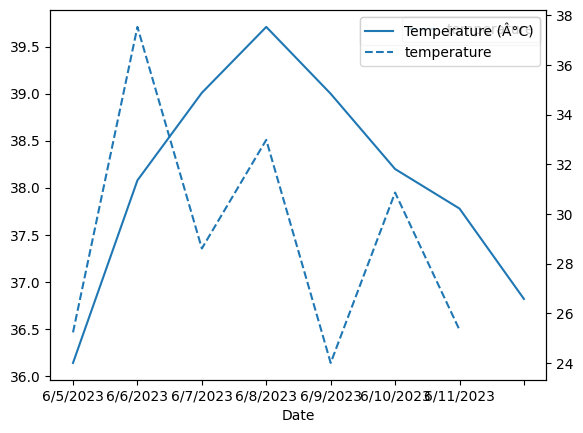

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

df_actual.plot(x="Date", y=["Temperature (Â°C)"], ax=ax)
df_pred.plot(x="date", y=["temperature"], ax=ax2, ls="--")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [ ]:
!pip install chart_studio

In [ ]:
from chart_studio import plotly as py
from plotly.graph_objs import *
import plotly.graph_objects as go
trace1 = {
    "name": "Predicted Values",
    "type": "scatter",
    "x": df_final['Date'],
    "y": df_final['Pred_temperature']
  }
trace2 = {
    "mode": "markers",
    "name": "Actual Values",
    "type": "scatter",
    "x": df_final['Date'],
    "y": df_final['Actual_temperature']
  }
data = Data([trace1, trace2])
fig = Figure(data=data)
fig

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:31: DeprecationWarning: plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.

  warnings.warn(
